# Assignment 3

In [28]:
import sympy as sym
import scipy as sci
import numpy as np
import math as math
import matplotlib.pyplot as plt
import scipy.special as scisp

from scipy import inf
from scipy.integrate import quad

from sympy import collect, symbols, simplify, sqrt, exp, factorial, Poly, pi, integrate, oo, limit, diff
from sympy.functions import Abs
from sympy.functions.special.gamma_functions import gamma 
from sympy.plotting import plot
from sympy.physics.mechanics import *

from fractions import Fraction 
from matplotlib.ticker import MaxNLocator
from math import inf
from IPython.display import Math, display
sym.init_printing()

# plt.rcParams['figure.dpi'] = 100
# plt.rcParams['savefig.format'] = 'svg'
%matplotlib inline
%config InlineBackend.figure_format = 'pdf'
# plt.rcParams['figure.figsize'] = (6.4, 4.8)

In [2]:
k, z, A, epsilon, vphi, lam = symbols('k z A epsilon varphi lambda')

## Double-well potential: 

### b) The plot: 

In [3]:
g = np.linspace(10**(-10), 1, 100)

In [4]:
def y(g):
    y = np.exp(-1/g)
    return y

def Y(g):
    Y = 0
    for i in range(0, 200):
        Y += (-1/g)**i / factorial(i) 
    return Y

In [29]:
plt.plot(g, y(g), label='Exact')
plt.plot(g, Y(g), label='Taylor series')
plt.title(r'$e^{-\frac{1}{g}}$ for values less than 1')
plt.xlabel(r'$g$')
plt.ylabel(r'$e^{-\frac{1}{g}}$')
plt.legend()

/Users/Kev/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in power
  


<Figure size 432x288 with 1 Axes>

Taylor series for $e^{-\frac{1}{g}}$:

$$e^{-\frac{1}{g}} \approx \sum_{n=0}^{\infty} \frac{1}{n!} \left(\frac{-1}{g}\right)^n$$

### c) Calculate $c_n$: 

In [6]:
r0 = 30 # n values 

c = symbols('c0:250')

Define :
$$H = -\frac{1}{A} \sum_{n=1}^{\infty} c_n \left(Ae^{-A}\right)^n$$

In [7]:
H = 0
for n in range(1, r0):
    h = (-1/A) * c[n] * (A*exp(-A))**n
    H += h

# len(Poly(H, exp(-A)).all_coeffs())

Define :
$$G = \sum_{m=0}^{\infty} \frac{(-1)^m}{m!} \left[\sum_{n=1}^{\infty} c_n\left(Ae^{-A}\right)^n\right]^m$$

In [8]:
G = 0
for n in range(0, r0*2):
    F = 0
    for i in range(1, math.ceil((r0*2+2)/(n+1))):
        f1 = c[i] * (A*exp(-A))**i
        F += f1
    g1 = (-1)**n * F**n / factorial(n)
    G += g1

# G.expand().collect(A*exp(-A))

Define: 

$$0 = e^{-A}H + G = e^{-A} \sum_{m=0}^{\infty} \frac{(-1)^m}{m!} \left[\sum_{n=1}^{\infty} c_n\left(Ae^{-A}\right)^n\right]^m - \frac{1}{A} \sum_{n=1}^{\infty} c_n \left(Ae^{-A}\right)^n$$

In [9]:
sol1 = exp(-A)*G + H

In [10]:
# Expand and collect the exponential terms 
# This is going to take a while, as in...forever...
sol2 = sol1.expand().collect(A*exp(-A))

Here we plot the difference in coefficients into the array. As the difference in coefficients is zero, we can find the values of each coefficient using previous coefficents. 

In [11]:
# Find the coefficients 
Coeff = []
coeff = Poly(sol2, exp(-A)).all_coeffs()
coeff = coeff[::-1]
for i in range(0, math.ceil(len(coeff)/2)):
    coeff[i] = coeff[i].subs({A:1})
    co = coeff[i].subs({c[i]:0})
    Coeff.append(co)

# Display the length of the coefficients
# and the last term in the coefficients 
# display(len(Coeff), Coeff[len(Coeff)-1])

In [12]:
CoeffVal = []
Coeff2 = Coeff
for i in range(0, len(Coeff)):
    rep = [(c[n], CoeffVal[n]) for n in range(i)]
    CV = Coeff2[i].subs(rep)
    CoeffVal.append(CV)

# Coeff2[2]
for i in range(1, len(Coeff)):
    print('Coefficient', i, ':', CoeffVal[i], '≈', CoeffVal[i].evalf())
#     print(' ')

Coefficient 1 : 1 ≈ 1.00000000000000
Coefficient 2 : -1 ≈ -1.00000000000000
Coefficient 3 : 3/2 ≈ 1.50000000000000
Coefficient 4 : -8/3 ≈ -2.66666666666667
Coefficient 5 : 125/24 ≈ 5.20833333333333
Coefficient 6 : -54/5 ≈ -10.8000000000000
Coefficient 7 : 16807/720 ≈ 23.3430555555556
Coefficient 8 : -16384/315 ≈ -52.0126984126984
Coefficient 9 : 531441/4480 ≈ 118.625223214286
Coefficient 10 : -156250/567 ≈ -275.573192239859
Coefficient 11 : 2357947691/3628800 ≈ 649.787172343474
Coefficient 12 : -2985984/1925 ≈ -1551.16051948052
Coefficient 13 : 1792160394037/479001600 ≈ 3741.44970295924
Coefficient 14 : -7909306972/868725 ≈ -9104.50024115802
Coefficient 15 : 648700729101703/29059430400 ≈ 22323.2430977623
Coefficient 16 : -72010490839108831/1307674368000 ≈ -55067.6013855376
Coefficient 17 : 258563306399074307/1902071808000 ≈ 135937.720811366
Coefficient 18 : -59797956519316526113/177843714048000 ≈ -336238.797302541
Coefficient 19 : 5161718974514154127219/6402373705728000 ≈ 806219.569766

#### Ratio between successive coefficients to estimate the recurrance relation of the coefficients:

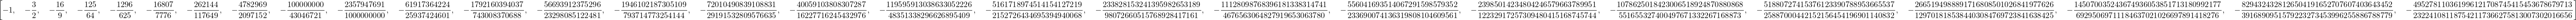

In [13]:
# Plan b: If can't find the 100th term,
# Sample the first couple terms, then
# find the recurssion relation 

Recur = []
for i in range(1, len(CoeffVal)-2):
    RC = CoeffVal[i+1]/CoeffVal[i]
    Recur.append(RC)
    
display(Recur)

The above array is the relationship between each coefficients. From the relationship between the values we can guess the recurrance relation might be: 

$$c_{n+1} = -c_n \left(\frac{n+1}{n}\right)^{n-1} = c_1 (-1)^{n+1} \prod_{m=1}^n \left( \frac{m+1}{m} \right) ^{m-1} \ \text{for} \ c_1 = 1, n \in \left\{ 1 \leq \mathbb{Z} \right\}$$ 

In [14]:
# Coefficent from recurrsion formula:
nn = 30 # Terms

CC = []
c1 = 1
CC.append(c1)

# Recurrsion formula 
def cn(n):
    Prod = 1
    for m in range(1, n):
        prod = Fraction((m+1), m)**(m-1)
        Prod = Prod*prod
    cn1 = Prod * (-1)**(n+1)
    return(cn1)

for n in range(1, nn):
    CC.append(cn(n))

In [15]:
# Check if the coefficients from the recurrsion fromula 
# matches the coefficients calculated from the series
for i in range(1, len(CC)):
    # Error check up to 10^(-10) 
    if CC[i] - CoeffVal[i] < 10**(-10):
        continue
    else: 
        print('Coefficient', i, 
              'obtained from the recurrsion relation is inaccurate')
        print('Recurrsion coefficient:', float(CC[i]))
        print('Series coefficient:', float(CoeffVal[i]))
        print('Absolute error:', float(CC[i] - CoeffVal[i]))
        print('Relative error:', float((CC[i] - CoeffVal[i])/CoeffVal[i]), '\n')

Coefficient 15 obtained from the recurrsion relation is inaccurate
Recurrsion coefficient: 22324.3085127066
Series coefficient: 22323.243097762268
Absolute error: 1.0654149443342151
Relative error: 4.772670976472118e-05 

Coefficient 17 obtained from the recurrsion relation is inaccurate
Recurrsion coefficient: 136808.86090394293
Series coefficient: 135937.72081136607
Absolute error: 871.1400925768555
Relative error: 0.006408376478414646 

Coefficient 19 obtained from the recurrsion relation is inaccurate
Recurrsion coefficient: 855992.9659966076
Series coefficient: 806219.5697661523
Absolute error: 49773.396230455284
Relative error: 0.06173677506351314 

Coefficient 21 obtained from the recurrsion relation is inaccurate
Recurrsion coefficient: 5445552.922314462
Series coefficient: 4574002.048169722
Absolute error: 871550.8741447403
Relative error: 0.19054448707417823 

Coefficient 23 obtained from the recurrsion relation is inaccurate
Recurrsion coefficient: 35117044.985139236
Series 

The relative error grows larger with larger coefficients, but this applies only to odd coefficients. Even coefficients are surprisingly accurate. This indicates there might be a difference in the recurrance relation for even and odd terms, or that my code is not calculating the odd coefficients correctly due to error. Assuming the accuracy remains true for higher even coefficients, let's generate the coefficients up to the 100th term:  

In [16]:
for i in range(1, 101):
    print('Coefficient', i, ':', float(cn(i)))

Coefficient 1 : 1.0
Coefficient 2 : -1.0
Coefficient 3 : 1.5
Coefficient 4 : -2.6666666666666665
Coefficient 5 : 5.208333333333333
Coefficient 6 : -10.8
Coefficient 7 : 23.343055555555555
Coefficient 8 : -52.01269841269841
Coefficient 9 : 118.62522321428571
Coefficient 10 : -275.5731922398589
Coefficient 11 : 649.7871723434745
Coefficient 12 : -1551.1605194805195
Coefficient 13 : 3741.4497029592385
Coefficient 14 : -9104.500241158019
Coefficient 15 : 22324.3085127066
Coefficient 16 : -55103.621972903835
Coefficient 17 : 136808.86090394293
Coefficient 18 : -341422.05066583835
Coefficient 19 : 855992.9659966076
Coefficient 20 : -2154990.2060910882
Coefficient 21 : 5445552.922314462
Coefficient 22 : -13807330.002166629
Coefficient 23 : 35117044.985139236
Coefficient 24 : -89568002.56102797
Coefficient 25 : 229041684.61879498
Coefficient 26 : -587103504.1171799
Coefficient 27 : 1508256053.8577929
Coefficient 28 : -3882630161.293189
Coefficient 29 : 10013943136.654829
Coefficient 30 : -2587

$$\therefore c_{100} \approx −1.0715102881254669 \times 10^{40}$$

I'm not writing it as a fraction, because....well....just look at the amout of digits in the numerator and denominator.

## Funny perturbation theory:

$$Z(\lambda) = \frac{1}{\sqrt{2\pi}} \sum_{n=0}^{\infty} \left[ \frac{(-1)^n}{n!} \int_{-\infty}^{\infty} d\varphi \ \varphi^{4n} e^{-\frac{1}{2} \varphi^2} \right] \lambda^n $$

### a) Find $c_n$

#### Do the integral: $$\int_{-\infty}^{\infty} d\varphi \ \varphi^{4n} e^{-\frac{1}{2} \varphi^2}$$

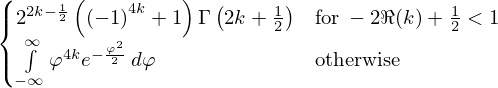

In [17]:
k = symbols('k')
Integral = vphi**(4*k) * exp(-vphi**2/2)
Inte = integrate(Integral, (vphi, -oo, oo)).simplify(rational=True)
display(Inte)

$$\therefore Z(\lambda) = \frac{1}{\sqrt{\pi}} \sum_{n=0}^{\infty} \left\{ \frac{(-1)^n}{n!} 2^{2n-1} \left[ (-1)^{4n}+1 \right] \Gamma \left( 2n+\frac{1}{2} \right) \right\} \lambda^n \ \text{for} \ Re(n)> -\frac{1}{4}$$

$$ \Rightarrow c_n = \frac{1}{\sqrt{\pi}} \left\{ \frac{(-1)^n}{n!} 2^{2n-1} \left[ (-1)^{4n}+1 \right] \Gamma \left( 2n+\frac{1}{2} \right) \right\} = \frac{1}{\sqrt{\pi}} \left\{ \frac{(-1)^n}{n!} \left(2^{2n}\right) \Gamma \left( 2n+\frac{1}{2} \right) \right\} \ \text{for} \ n \in \left\{ \mathbb{Z} >0 \right\}$$

### b) Plotting the approximate solution

#### Here's the functions

Order 0 :


 
Order 1 :


 
Order 2 :


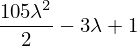

 
Order 3 :


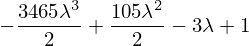

 
Order 4 :


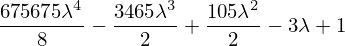

In [18]:
order = 4
Fn = 0
for m in range(0, order+1):
    Func = 0
    Fn = 0
    for n in range(0, m+1):
        Gamm = gamma(2*n + sym.Rational(1, 2))
        Frac = (-1)**n / factorial(n)
        func = 2**(2*n) * Frac * Gamm * lam**n
        Func += func
    Fn = Func/(pi**0.5)
    print('Order', m, ':')
    display(Fn.expand().collect(lam))
    print(' ')

#### Plot the approximate solution:

In [30]:
Lam = np.linspace(0, 0.1, 100)
Fn = 0
for m in range(0, order+1):
    def fn(LAM):
        Func = np.zeros_like(LAM)
        for n in range(0, m+1):
            Gamm = scisp.gamma(2*n + 0.5)
            Frac = (-1)**n / np.math.factorial(n)
            func = 2**(2*n) * Frac * Gamm * LAM**n
            Func += func
        return Func/(pi**0.5)
    plt.plot(Lam, fn(Lam), label = m)

plt.legend()
plt.title(r'$Z(\lambda)$ for different orders of $\lambda^n$')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$Z(\lambda)$')
plt.ylim(0.75, 1.2)

<Figure size 432x288 with 1 Axes>

### c) Plot the exact solution:

In [31]:
Zex = []
for lam in Lam:
    first, last = quad(lambda x, lam: np.exp(-0.5 * x**2 - lam * x**4), -inf, inf, lam)
    z = (2*pi)**(-0.5) * (first - last)
    Zex.append(z)
    
plt.plot(Lam, Zex[:])
plt.title(r'$Z(\lambda) = \left(2\pi\right)^{-\frac{1}{2}}$ $\int_{-\infty}^{\infty} d\varphi$ $\ e^{-\frac{1}{2}\varphi^2 - \lambda \varphi^4}$')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$Z(\lambda)$')

Text(0, 0.5, '$Z(\\lambda)$')

<Figure size 432x288 with 1 Axes>

In [32]:
Lam = np.linspace(0, 0.1, 100)
Fn = 0

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6))

ax1.plot(Lam, Zex[:], label='Exact')
ax2.plot(Lam, Zex[:], label='Exact')

for m in range(0, order+1):
    def fn(lam):
        Func = np.zeros_like(lam)
        for n in range(0, m+1):
            Gamm = scisp.gamma(2*n + 0.5)
            Frac = (-1)**n / np.math.factorial(n)
            func = 2**(2*n) * Frac * Gamm * lam**n
            Func += func
        return Func/(pi**0.5)
    ax1.plot(Lam, fn(Lam), label = m, linestyle = '--') 
    ax2.margins(x=0, y=-0.25)
    ax2.plot(Lam, fn(Lam), label = m, linestyle = '--')

ax1.set_title(r'$Z(\lambda) = \left(2\pi\right)^{-\frac{1}{2}}$ $\int_{-\infty}^{\infty} d\varphi$ $\ e^{-\frac{1}{2}\varphi^2 - \lambda \varphi^4}$ with Taylor series approximation', fontsize = 14)
ax1.set_xlabel(r'$\lambda$', fontsize = 12)
ax1.set_ylabel(r'$Z(\lambda)$', fontsize = 12)
ax1.set_ylim(0.85, 1.01)
ax1.set_xlim(0, 0.1)
ax1.legend()

ax2.set_title(r'Close-up of $Z(\lambda) = \left(2\pi\right)^{-\frac{1}{2}}$ $\int_{-\infty}^{\infty} d\varphi$ $\ e^{-\frac{1}{2}\varphi^2 - \lambda \varphi^4}$ with Taylor series approximation',  fontsize = 14)
ax2.set_ylim(0.965, 1.001)
ax2.set_xlim(0, 0.0125)
ax2.set_xlabel(r'$\lambda$', fontsize = 12)
ax2.set_ylabel(r'$Z(\lambda)$', fontsize = 12)
ax2.legend()

fig.tight_layout()

<Figure size 1152x432 with 2 Axes>

### d) Coefficients $c_n$ at large $n$:

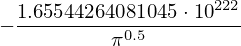

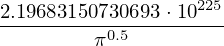

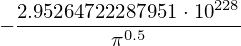

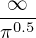

/Users/Kev/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


In [22]:
cn = 0
for n in range(83, 88):
    Gamm = scisp.gamma(2*n + 0.5)
    Frac = (-1)**n / math.factorial(n)
    Summ = 2**(2*n) * Frac * Gamm
    cn += Summ
    Cn = cn/(pi**0.5)
    display(Cn)

As we can see, the magnitude of the coefficients get larger with larger $n$ values while alternating between positive and nagative values. Eventually, Python breaks down and rage-quits, hence we get "NaN".

#### Radius of convergence:

Use ratio test:

$$L = \lim_{n\to\infty} \left|\frac{c_{n+1}}{c_n}\right|$$
$$\therefore L = \lim_{n\to\infty} \left|\frac{\frac{(-1)^{n+1}}{(n+1)!} 2^{2(n+1)-1} \left[ (-1)^{4(n+1)}+1 \right] \Gamma \left( 2(n+1)+\frac{1}{2} \right)}{\frac{(-1)^n}{n!} 2^{2n-1} \left[ (-1)^{4n}+1 \right] \Gamma \left( 2n+\frac{1}{2} \right)}\right| = \lim_{n\to\infty} \left|\frac{- 2^{2} \left[ (-1)^{4(n+1)}+1 \right] \Gamma \left( 2(n+1)+\frac{1}{2} \right)}{(n+1) \left[ (-1)^{4n}+1 \right] \Gamma \left( 2n+\frac{1}{2} \right)}\right|$$
$$\Rightarrow L = \lim_{n\to\infty} \left|\frac{- 2^2 \Gamma \left( 2(n+1)+\frac{1}{2} \right)}{(n+1) \Gamma \left( 2n+\frac{1}{2} \right)}\right| = \lim_{n\to\infty} \left|\frac{4 \Gamma \left( 2n+\frac{5}{2} \right)}{(n+1) \Gamma \left( 2n+\frac{1}{2} \right)}\right|$$

In [23]:
coeffn1 = -4*gamma(2*k+2.5)
coeffn0 = (k+1)*gamma(2*k+0.5)
ratio = coeffn1/coeffn0
L = limit(ratio, k, inf)
print('L = ', L)

L =  -oo


Well then...because $L=-\infty \ll 1$ we can safely say this series is divergent, and with a radius of convergence of zero. 

### e) Order which the perturbation theory breaks down:

The perturbation theory breaks down when $c_{n+1} \lambda^{n+1} \geq c_n\lambda^n$. 

$$\therefore Ratio = \left| \frac{c_{n+1} \lambda}{c_n} \right| = \left|\frac{4 \Gamma \left( 2n+\frac{5}{2} \right) \lambda}{(n+1) \Gamma \left( 2n+\frac{1}{2} \right)}\right| \geq 1 \ \ \text{For theory breakdown}$$

We can stop here, but let's solve for $n$ as a function of $\lambda$ anyways:

$$\left|\frac{4  \left( 2n+\frac{3}{2} \right) \left( 2n+\frac{1}{2} \right) \Gamma \left( 2n+\frac{1}{2} \right) \lambda}{(n+1) \Gamma \left( 2n +\frac{1}{2} \right)}\right| \geq 1$$

$$\left|  \left( 4n+3 \right) \left( 4n+1 \right) \lambda \right| \geq \left| (n+1)\right|$$

$$\left| (16n^2 + 16n + 3)\lambda \right| \geq \left| n+1 \right|$$

$$\left| 16\lambda n^2 + (16\lambda - 1)n + (3\lambda - 1)\right| \geq 0$$

$$\therefore n \geq \frac{-(16\lambda - 1) \pm \sqrt{(16\lambda-1)^2 - 4(16\lambda)(3\lambda-1)}}{32\lambda}$$

$$n \geq \frac{-(16\lambda - 1) \pm \sqrt{(256\lambda^2-32\lambda+2) - (192\lambda^2 - 64\lambda)}}{32\lambda}$$

$$n \geq \frac{-(16\lambda - 1) \pm \sqrt{(64\lambda^2+32\lambda+2)}}{32\lambda} = -\frac{1}{2} + \frac{1 \pm \sqrt{(64\lambda^2+32\lambda+2)}}{32\lambda}$$

Take the positive square root, otherwise $n$ won't make sense.

$$\therefore n \geq -\frac{1}{2} + \frac{1 + \sqrt{(64\lambda^2+32\lambda+2)}}{32\lambda}$$ 

In [24]:
def RT(N, LAM):
    CNg = scisp.gamma(2*N + 2.5)/scisp.gamma(2*N + 0.5)
    CNf = 4 / (n + 1)
    Rt = CNg * CNf * LAM
    return(abs(Rt))

In [25]:
Res = 10**(6)
LamSp = np.linspace(1/Res, 1, Res)

BrPtl = []
BrPtn = []

for n in range(0, 100):
    for l in range(0, len(LamSp)-1):
        if RT(n, LamSp[l]) > 1: 
            BrPtn.append(n)
            BrPtl.append(LamSp[l])
            break 

/Users/Kev/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


#### Array of $n$ values for various $\lambda$ values where the perturbation theory falls apart:  

In [26]:
print('Breaking point:')
for i in range(0, len(BrPtl)-1):
    print('n =', BrPtn[i], ': lambda ≈', BrPtl[i])

Breaking point:
n = 0 : lambda ≈ 0.33333399999999996
n = 1 : lambda ≈ 0.057143
n = 2 : lambda ≈ 0.030304
n = 3 : lambda ≈ 0.020513
n = 4 : lambda ≈ 0.015479999999999999
n = 5 : lambda ≈ 0.012422999999999998
n = 6 : lambda ≈ 0.010370999999999998
n = 7 : lambda ≈ 0.008898999999999999
n = 8 : lambda ≈ 0.007793
n = 9 : lambda ≈ 0.006931
n = 10 : lambda ≈ 0.00624
n = 11 : lambda ≈ 0.005674
n = 12 : lambda ≈ 0.005203
n = 13 : lambda ≈ 0.004803
n = 14 : lambda ≈ 0.004461
n = 15 : lambda ≈ 0.004164
n = 16 : lambda ≈ 0.003904
n = 17 : lambda ≈ 0.003675
n = 18 : lambda ≈ 0.003471
n = 19 : lambda ≈ 0.003288
n = 20 : lambda ≈ 0.003124
n = 21 : lambda ≈ 0.002975
n = 22 : lambda ≈ 0.00284
n = 23 : lambda ≈ 0.002717
n = 24 : lambda ≈ 0.002604
n = 25 : lambda ≈ 0.0025
n = 26 : lambda ≈ 0.002404
n = 27 : lambda ≈ 0.0023150000000000002
n = 28 : lambda ≈ 0.002232
n = 29 : lambda ≈ 0.0021550000000000002
n = 30 : lambda ≈ 0.002083
n = 31 : lambda ≈ 0.002016
n = 32 : lambda ≈ 0.0019529999999999999
n = 33 : 

#### Plot of the order of $n$ where the perturbation theory falls appart with respect to $\lambda$:

In [33]:
plt.figure(figsize=(10,5))
ax = plt.gca()
ax.scatter(BrPtn[:len(BrPtn)-1], BrPtl[:len(BrPtn)-1], s=4)
ax.set_xlabel(r'$n$', fontsize = 14)
ax.set_ylabel(r'$\lambda$', fontsize = 14)
ax.set_title(r'Order $(n)$ which the perturbation theory falls apart with respect to $\lambda$', fontsize = 14)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_yscale('log')
ax.set_ylim(100/Res, 1)

<Figure size 720x360 with 1 Axes>

### f) The paragraph 

Lesson learned from this problem: As with not judging a book by its cover, we shouldn't judge a series on the size of its radius of convergence. Even if it does not exist. The series analyzed here diverges faster by including higher order terms, but it's accuracy for estimating smaller values of $\lambda$ increases, even as the interval decreases. Therefore, we shouldn't throw a series out just because it is divergent, it still has its uses, albeit quite limited compared to a convergent series. 